## Observations and Insights

1. Capomulin and Ramicane were the most frequent used drugs in the drug regimen for mice tumor treatment.

2. Mouse m957 treated in Capomulin drug regimen significantly decreased its tumor volume over the full course of the study. This suggests that Capomulin is effective as a tumor treatment.

3. The biggest tumor shrink in Capomulin treatment happened between days 30-40 (about 4 - 5 weeks).

4. There is a positive correlation between the mouse's weight and the tumor volume.
5. The sex distribution was almost 1:1 for male and female mice.

In [1337]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [1338]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

In [1339]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [1340]:
# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how ='left', on = ['Mouse ID', 'Mouse ID'])

In [1341]:
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1342]:
# Checking the number of mice
number_of_mice = mouse_metadata['Mouse ID'].count()
number_of_mice

249

In [1343]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicated_mice_by_ID = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice_by_ID.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      0          45.000000           0                   1
          5          47.570392           0                   1
          10         49.880528           0                   1
          15         53.442020           0                   1
          20         54.657650           1                   1
dtype: int64

In [1344]:
# Getting the duplicate mice by ID number and converting it into Series
duplicated_mice_ID = duplicated_mice_by_ID['Mouse ID'].unique()
duplicated_mice_ID = pd.Series(duplicated_mice_ID.squeeze())
duplicated_mice_ID

0    g989
dtype: object

In [1345]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_complete_data = mouse_data_complete[mouse_data_complete['Mouse ID'] == 'g989']
duplicated_mice_complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [1346]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_data_complete_clean_df = mouse_data_complete[~ mouse_data_complete['Mouse ID'].isin(duplicated_mice_ID)]
mouse_data_complete_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1347]:
# Checking the number of mice in the clean DataFrame
number_of_mice = mouse_data_complete_clean_df['Mouse ID'].nunique()
number_of_mice

249

## Summary Statistics

In [1348]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
drug_regimen = mouse_data_complete_clean_df.groupby('Drug Regimen')
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
SD = drug_regimen['Tumor Volume (mm3)'].std()
SEM = drug_regimen['Tumor Volume (mm3)'].sem()

In [1349]:
# Assemble the resulting series into a single summary dataframe
drug_regimen_summary = pd.DataFrame({'Mean': mean,
                                     'Median': median,
                                     'Variance': variance,
                                     'Standard Deviation': SD,
                                     'SEM': SEM
                                     })
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1350]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary_agg = mouse_data_complete_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_regimen_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

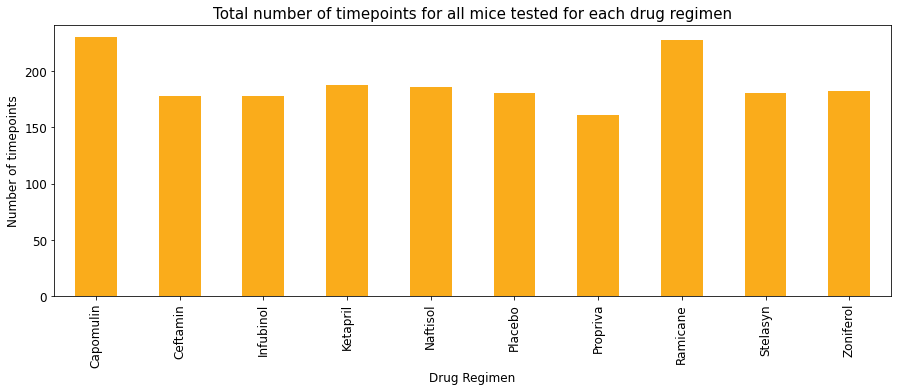

In [1351]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
drug_total_number_of_timepoints = mouse_data_complete_clean_df.groupby('Drug Regimen')['Timepoint'].count()
drug_total_number_of_timepoints.plot(kind ='bar', figsize = (15, 5), color = '#FAAC1B', fontsize = 12)
plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Number of timepoints',  fontsize = 12)
plt.title('Total number of timepoints for all mice tested for each drug regimen', fontsize = 15)
plt.show()

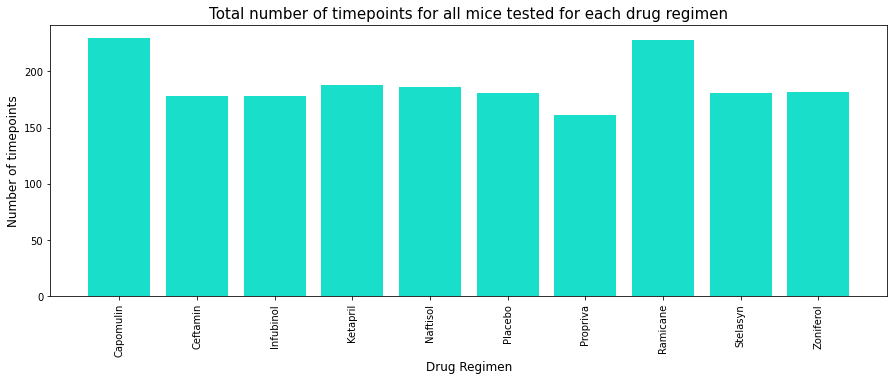

In [1352]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
drug_regimen = mouse_data_complete_clean_df['Drug Regimen'].sort_values().unique()
timepoint_count = mouse_data_complete_clean_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]
plt.figure(figsize = (15, 5))
plt.bar(x_axis, timepoint_count, color = '#18DECA', align = 'center')
plt.xticks(tick_locations, drug_regimen, rotation = 'vertical')
plt.title('Total number of timepoints for all mice tested for each drug regimen', fontsize = 15)
plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Number of timepoints', fontsize = 12)
plt.show()

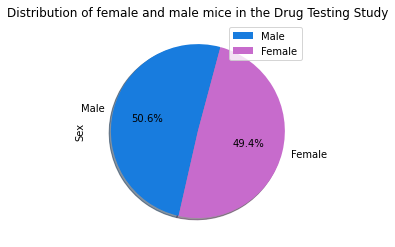

In [1353]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_data_complete_clean_df.groupby(['Mouse ID', 'Sex'])
female_vs_male = mouse_data_complete_clean_df['Sex'].value_counts()
pie = female_vs_male.plot\
    (kind = 'pie', title = 'Distribution of female and male mice in the Drug Testing Study', colors = ['#187CDE', '#C76BCC'], autopct = '%.1f%%', shadow =True, startangle = 75)
pie.legend(loc = 'upper right')

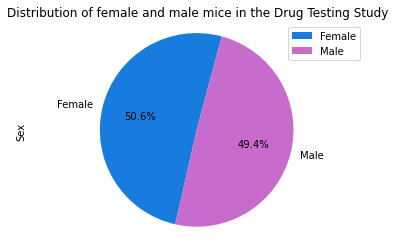

In [1354]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_data_complete_clean_df['Sex'].unique()
plt.pie(female_vs_male, labels = labels, colors = ['#187CDE', '#C76BCC'], autopct = '%1.1f%%', startangle = 75)
plt.axis('equal')
plt.title('Distribution of female and male mice in the Drug Testing Study')
plt.ylabel('Sex')
plt.legend(labels, loc = 'upper right')
plt.show()

## Quartiles, Outliers and Boxplots

In [1355]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_data_complete_clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_at_the_last_timepoint = pd.merge(max_timepoint, mouse_data_complete_clean_df, how ='left', on =['Mouse ID', 'Timepoint'])
tumor_volume_at_the_last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [1356]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_treatment = tumor_volume_at_the_last_timepoint.loc[tumor_volume_at_the_last_timepoint['Drug Regimen'] == treatment]

# add subset
tumor_volume_data.append(final_treatment['Tumor Volume (mm3)'])

In [1357]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Lower boundary = First quartile — (1.5 * IQR)
# Upper boundary = Third quartile + (1.5 * IQR)
# A value is considered an outlier if it falls outside this range and is represented in a box plot with a dot

IQR = ''
quartile_one = ''
quartile_two = ''
quartile_three = ''
quartile_four = ''
lower_boundary = ''
upper_boundary = ''

# Capomulin
# print(f'The lower quartile of {treatments[0]}: {}')
# print(f'The upper quartile of {treatments[0]}: {}')
# print(f'The interquartile range of {treatments[0]} tumor volume: {}')
# print(f'The median of {treatments[0]}:{}')
# print(f'Values below {lower_boundary} and above {upper_boundary} represent the outliers.')

# Ramicane
# print(f'The lower quartile of {treatments[1]}: {}')
# print(f'The upper quartile of {treatments[1]}: {}')
# print(f'The interquartile range of {treatments[1]} tumor volume: {}')
# print(f'The median of {treatments[1]}:{}')
# print(f'Values below {lower_boundary} and above {upper_boundary} represent the outliers.')

# Infubinol
# print(f'The lower quartile of {treatments[2]}: {}')
# print(f'The upper quartile of {treatments[2]}: {}')
# print(f'The interquartile range of {treatments[2]} tumor volume: {}')
# print(f'The median of {treatments[2]}:{}')
# print(f'Values below {lower_boundary} and above {upper_boundary} represent the outliers.')

# Ceftamin
# print(f'The lower quartile of {treatments[3]}: {}')
# print(f'The upper quartile of {treatments[3]}: {}')
# print(f'The interquartile range of {treatments[3]} tumor volume: {}')
# print(f'The median of {treatments[3]}:{}')
# print(f'Values below {lower_boundary} and above {upper_boundary} represent the outliers.')

/var/folders/st/_tnw29g155180j90ywt8nzlw0000gn/T/ipykernel_44736/3864340011.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


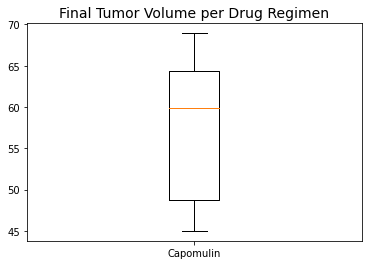

In [1358]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug Regimen', fontsize = 14)
ax1.set_xticklabels(treatments)
boxplot = ax1.boxplot(tumor_volume_data)
for flier in boxplot['fliers']:
    flier.set(marker= 'o', markeredgecolor = 'red', markersize = 10)
plt.show()

## Line and Scatter Plots

In [1359]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# List of mice treated with Capomulin
capomulin_treatment_mice = mouse_data_complete_clean_df.loc[mouse_data_complete_clean_df['Drug Regimen'] =='Capomulin']['Mouse ID'].value_counts()
capomulin_treatment_mice.head()

b128    10
v923    10
m957    10
i557    10
t565    10
Name: Mouse ID, dtype: int64

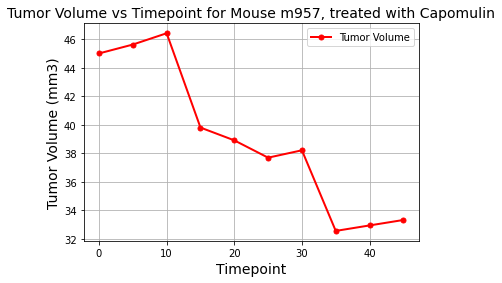

In [1360]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = 'm957'
mouse_df = mouse_data_complete_clean_df.loc[mouse_data_complete_clean_df['Mouse ID'] == mouse, ['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], linewidth = 2, color= 'red', marker = 'o', markersize = 5, label = 'Tumor Volume')
plt.title(f'Tumor Volume vs Timepoint for Mouse {mouse}, treated with Capomulin', fontsize = 14)
plt.xlabel('Timepoint', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', fontsize = 14)
plt.grid()
plt.legend(loc = 'upper right')

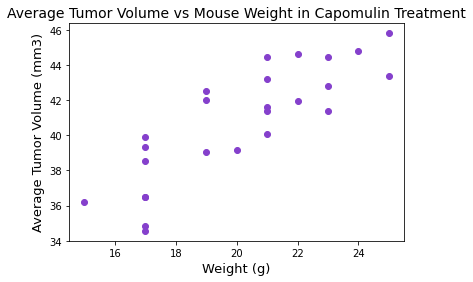

In [1361]:
# Generate a scatter plot of average tumor volume vs mouse weight for the Capomulin regimen
capomulin = mouse_data_complete_clean_df.loc[mouse_data_complete_clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
average_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(weight, average_tumor_volume, color = '#8540CC')
plt.title('Average Tumor Volume vs Mouse Weight in Capomulin Treatment', fontsize =14)
plt.xlabel('Weight (g)', fontsize = 13)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 13)
plt.show()

## Correlation and Regression

The correlation coefficient is 0.71. This shows positive correlation between mouse weight and average tumor volume.


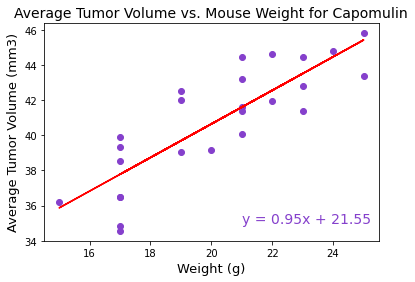

In [1362]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, average_tumor_volume)
fit = slope * weight + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(weight, average_tumor_volume, color = '#8540CC')
plt.plot(weight, fit, 'r-')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin', fontsize = 14)
plt.xlabel('Weight (g)', fontsize = 13)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 13)
plt.annotate(line_eq,(21,35), fontsize = 14, color = '#8540CC')
print(f'The correlation coefficient is {round(rvalue**2,2)}. This shows positive correlation between mouse weight and average tumor volume.')